# Effect Of Larning Rate, Optimizers, Momentum on Data

In [16]:
from sklearn.datasets import make_blobs
from keras.layers import Dense
import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
from numpy import where
import pandas as pd
from sklearn.model_selection import train_test_split

In [10]:
def scatter_of_data(X, y):
    print(X.shape)
    for class_value in range(2):
        row_ix = where(y == class_value)
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    pyplot.show()

## Data Preprocess

In [47]:
df_train = pd.read_csv("<name_of_csv>.csv", sep=";")

In [4]:
features = list(df_train.columns[:-1])
label = df_train.columns[-1]
print("Features: ", features)
print("\n")
print("Labels: ", label)

Features:  ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55', 'feature_56', 'feature_57', 'feature_58']


Labels:  target


In [11]:
X, y = df_train[features].values, df_train[label].values
print(X, X.shape)
print(y, y.shape)

[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.76 0.15]
 [0.   0.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]] (795, 59)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0

(795, 59)


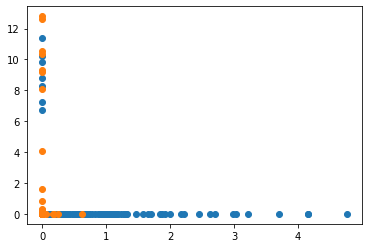

In [12]:
scatter_of_data(X, y)

In [13]:
from sklearn.preprocessing import StandardScaler

X_scaled = df_train[features].values
scaler = StandardScaler().fit(X_scaled)
features_scaled = scaler.transform(X_scaled)
df_train_scaled = pd.DataFrame(features_scaled, columns = features)
df_train_scaled["target"] = y

In [14]:
X_scaled, y_scaled = df_train_scaled[features].values, df_train_scaled[label].values
print(X_scaled, X_scaled.shape)
print(y_scaled, y_scaled.shape)

[[-0.26313652 -0.13788497 -0.30327493 ... -0.07677318 -0.46738747
  -0.22211904]
 [-0.26313652 -0.13788497 -0.30327493 ... -0.07677318  1.12035293
   0.09708674]
 [-0.26313652 -0.13788497 -0.30327493 ... -0.07677318 -0.46738747
  -0.22211904]
 ...
 [-0.26313652 -0.13788497 -0.30327493 ... -0.07677318 -0.46738747
  -0.22211904]
 [-0.26313652 -0.13788497 -0.30327493 ... -0.07677318 -0.46738747
  -0.22211904]
 [-0.26313652 -0.13788497 -0.30327493 ... -0.07677318 -0.46738747
  -0.22211904]] (795, 59)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

(795, 59)


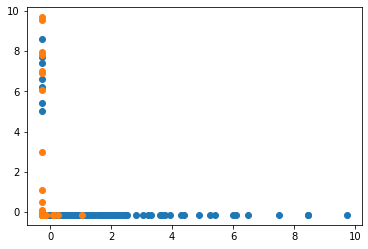

In [15]:
scatter_of_data(X_scaled, y_scaled)

## Implementation

In [43]:
def prepare_data(X, y):
    # one hot encode output variable
    y = to_categorical(y)
    trainX, testX, trainy, testy = train_test_split(X_scaled, y_scaled, test_size= 0.3, random_state= 0)
    return trainX, trainy, testX, testy
 
def fit_model(trainX, trainy, testX, testy, opt_name, opt_value, lrate, momentum):
    model = tf.keras.Sequential()
    model.add(layers.Dense(50, input_dim=59, activation='relu', kernel_initializer='he_uniform'))
    model.add(layers.Dense(1, activation='softmax'))
    model.compile(loss='categorical_crossentropy', 
                  metrics=['accuracy'],
                  optimizer=opt_value)
    
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
    pyplot.plot(history.history['accuracy'], label='train')
    pyplot.plot(history.history['val_accuracy'], label='test')
    pyplot.title('Optimizer:'+str(opt_name)
                 +' lrate='+str(lrate)
                 +' momentum='+str(momentum)
                 +' Accuracy-train:'
                 +str(max(history.history['accuracy']))
                 +' Accuracy-test:'
                 +str(max(history.history['val_accuracy'])), pad=-50)

In [44]:
trainX, trainy, testX, testy = prepare_data(X_scaled, y_scaled)

### Effect Of different Learning Rates On SGD

SGD 1.0


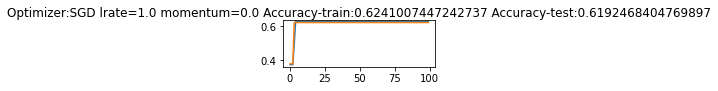

SGD 0.1


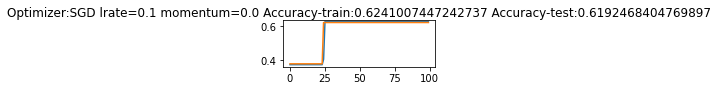

SGD 0.01


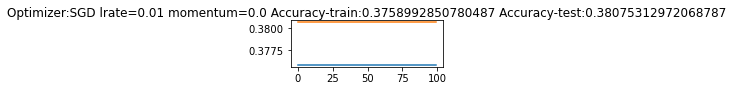

SGD 0.001


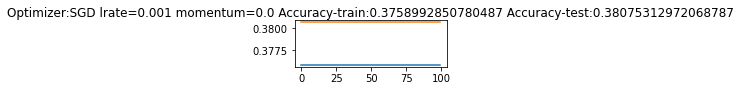

SGD 0.0001


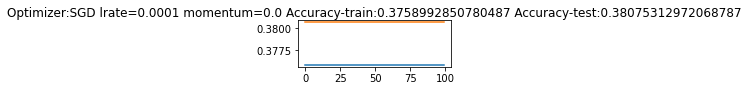

SGD 1e-05


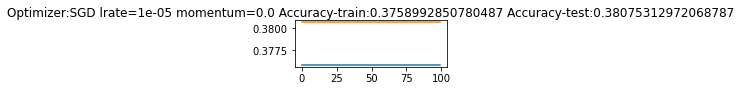

SGD 1e-06


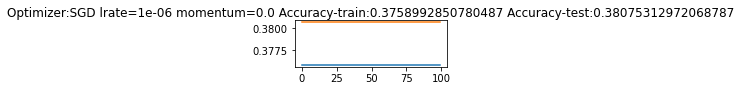

SGD 1e-07


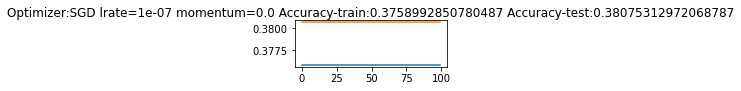

In [45]:
def SGD(lr):
    params = {
        'optimizer':[('SGD', tf.keras.optimizers.SGD(learning_rate=lr))]
    }
    return params, lr


learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
momentum = 0.0
for i in range(len(learning_rates)):
    plot_no = 420 + (i+1)
    pyplot.subplot(plot_no)
    optimizer, lrate = SGD(learning_rates[i])
    optimizer_name = optimizer["optimizer"][0][0]
    optimizer_value = optimizer["optimizer"][0][1]
    print(optimizer_name, lrate)
    fit_model(trainX, trainy, testX, testy, optimizer_name, optimizer_value, lrate, momentum)
    pyplot.show()

### Effect on different Learning Rate On Different Optimizers

In [ ]:
def get_different_optimizers(lr):
    params = {
        'optimizer':[('SGD', tf.keras.optimizers.SGD(learning_rate=lr)),
                     ('RMSprop', tf.keras.optimizers.RMSprop(learning_rate=lr)),
                     ('Adagrad', tf.keras.optimizers.Adagrad(learning_rate=lr)),
                     ('Adadelta', tf.keras.optimizers.Adadelta(learning_rate=lr)),
                     ('Adam', tf.keras.optimizers.Adam(learning_rate=lr)),
                     ('Adamax', tf.keras.optimizers.Adamax(learning_rate=lr)),
                     ('Nadam', tf.keras.optimizers.Nadam(learning_rate=lr)) 
                     ]
    }
    return params, lr

learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
momentum = 0.0
for x in range(len(learning_rates)): 
    plot_no = 420 + (x+1)
    pyplot.subplot(plot_no)
    optimizer, lrate = get_different_optimizers(learning_rates[x])
    for i in range(len(optimizer["optimizer"])):
        optimizer_name = optimizer["optimizer"][i][0]
        optimizer_value = optimizer["optimizer"][i][1]
        print(optimizer_name, lrate)
        fit_model(trainX, trainy, testX, testy, optimizer_name, optimizer_value, lrate, momentum)
        pyplot.show()

### Effect On Learning Curve While Adding Momentum in SGD and RMSProp

In [ ]:
def get_different_optimizers(lr, mo):
    params = {
        'optimizer':[('SGD', tf.keras.optimizers.SGD(learning_rate=lr, momentum=mo)),
                     ('RMSprop', tf.keras.optimizers.RMSprop(learning_rate=lr, momentum=mo))]
    }
    return params, lr, mo

learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
momentums = [0.0, 0.5, 0.9, 0.99]
for x in range(len(learning_rates)): 
    plot_no = 420 + (x+1)
    pyplot.subplot(plot_no)
    for m in range(len(momentums)):
        optimizer, lrate, mom = get_different_optimizers(learning_rates[x], momentums[m])
        for i in range(len(optimizer["optimizer"])):
            optimizer_name = optimizer["optimizer"][i][0]
            optimizer_value = optimizer["optimizer"][i][1]
            print(optimizer_name, lrate, mom)
            fit_model(trainX, trainy, testX, testy, optimizer_name, optimizer_value, lrate, mom)
            pyplot.show()